In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69010 entries, 3 to 200188
Data columns (total 36 columns):
loan_amnt                     69010 non-null float64
term                          69010 non-null object
int_rate                      69010 non-null float64
installment                   69010 non-null float64
grade                         69010 non-null object
sub_grade                     69010 non-null object
emp_title                     69010 non-null object
emp_length                    69010 non-null object
home_ownership                69010 non-null object
annual_inc                    69010 non-null float64
verification_status           69010 non-null object
issue_d                       69010 non-null object
loan_status                   69010 non-null int64
pymnt_plan                    69010 non-null object
purpose                       69010 non-null object
zip_code                      69010 non-null object
addr_state                    69010 non-null object
dti

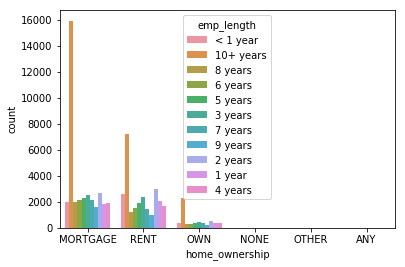

In [11]:
sns.countplot(x='home_ownership', hue='emp_length', data=data);

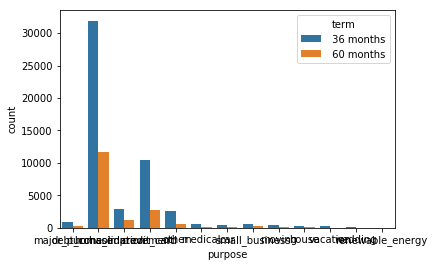

In [7]:
sns.countplot(x='purpose', hue='term', data=data);

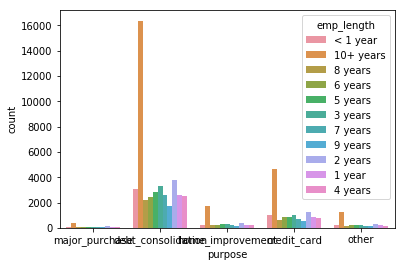

In [10]:
sns.countplot(x=data[data['purpose'].isin(data['purpose'].value_counts().head().index)]['purpose'], hue='emp_length', data=data);

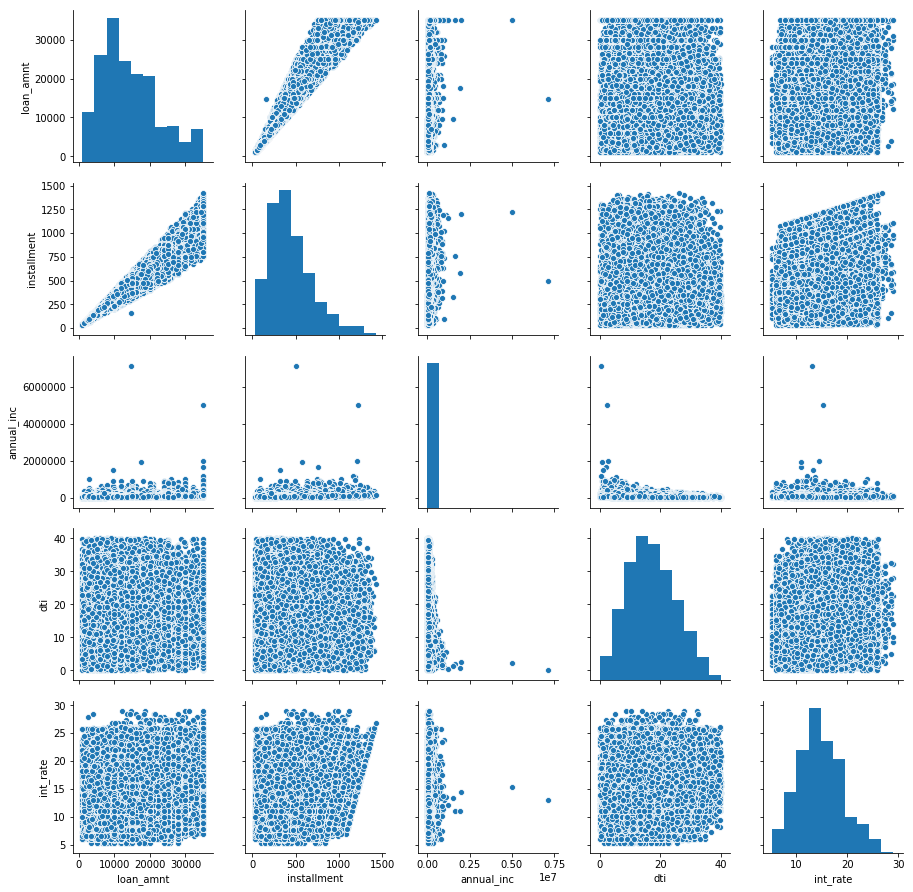

In [28]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[['loan_amnt', 'installment', 'annual_inc', 'dti', 'int_rate']]);

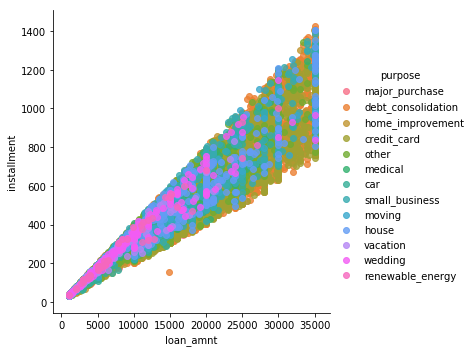

In [27]:
sns.lmplot('loan_amnt', 'installment', data=data, hue='purpose', fit_reg=False);

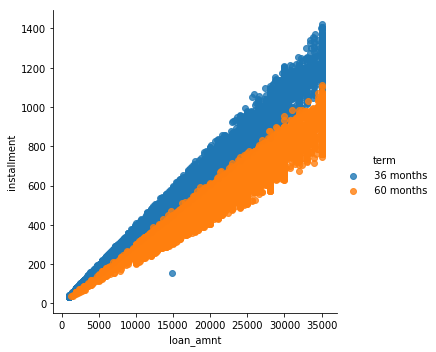

In [16]:
sns.lmplot('loan_amnt', 'installment', data=data, hue='term', fit_reg=False);

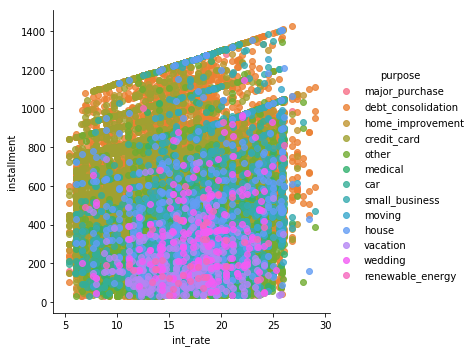

In [29]:
sns.lmplot('int_rate', 'installment', data=data, hue='purpose', fit_reg=False);

In [37]:
# X = data[['int_rate', 'installment', 'loan_amnt']]

# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(X)

# tsne = TSNE(random_state=17)
# tsne_repr = tsne.fit_transform(x_scaled)

# plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


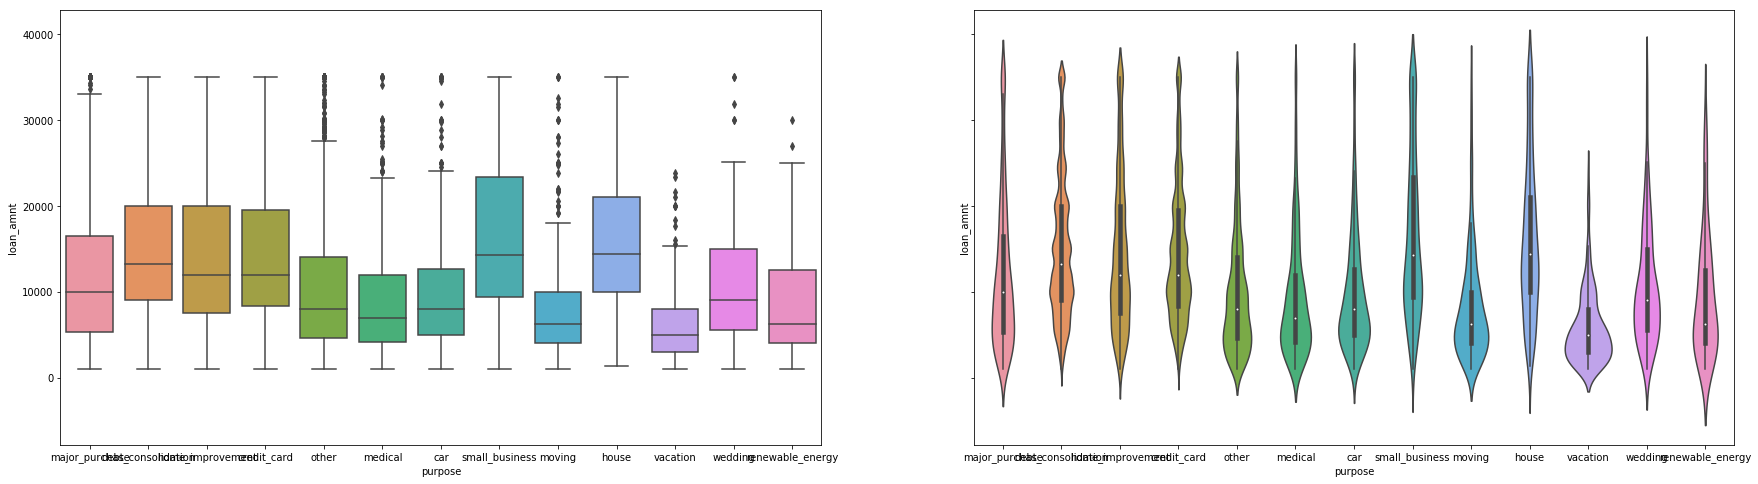

In [5]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(30, 8)) 
sns.boxplot(x='purpose', y='loan_amnt',
            data=data, ax=axes[0]);
sns.violinplot(x='purpose', y='loan_amnt', 
               data=data, ax=axes[1]);